# Extracting upstream seqs from genbank files for 5 organisms

In [1]:
import Bio
from Bio import SeqIO, SeqFeature
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import genbank_utils as gu
import viz as v

In [2]:
# genbank files
gbFile_5G = 'data/genomes/5GB1c_sequence_20220411.gb'
gbFile_ecoli = 'data/genomes/ecoli_NC_000913.3.gb'
gbFile_cauto = 'data/genomes/cauto_sequence.gb'
gbFile_bsub = 'data/genomes/bsubtilis_AL009126.gbff'
gbFile_tmari = 'data/genomes/tmaritima3.gb'


# General Genome info
Basic counts of various gene and CDS features in the 5G and E. coli genome genbank files

In [3]:
def look_at_gb(file, org_name):
    gb = SeqIO.parse(file, "genbank").__next__()
    #gb_ecoli = SeqIO.parse(gbFile_ecoli, "genbank").__next__()

    print(f"\n___ {org_name} ____")
    print("Genome length:", len(gb.seq), "bps")
    print("num features:", len(gb.features))
    print("num CDS features:", len([x for x in gb.features if x.type=='CDS']))
    print("num gene features:", len([x for x in gb.features if x.type=='gene']))
    print("A:",gb.seq.count("A")/len(gb.seq))
    print("C:",gb.seq.count("C")/len(gb.seq))
    print("G:",gb.seq.count("G")/len(gb.seq))
    print("T:",gb.seq.count("T")/len(gb.seq))
    
    return gb


In [4]:
gb_5G = look_at_gb(gbFile_5G, "5G")
gb_ecoli = look_at_gb(gbFile_ecoli, "ecoli")
gb_bsub = look_at_gb(gbFile_bsub, "bsub")
gb_tmari = look_at_gb(gbFile_tmari, "tmari")
gb_cauto = look_at_gb(gbFile_cauto, "cauto")



___ 5G ____
Genome length: 4998879 bps
num features: 8478
num CDS features: 4177
num gene features: 4234
A: 0.256196639286528
C: 0.24354360247567505
G: 0.24364442508010295
T: 0.25661533315769397

___ ecoli ____
Genome length: 4641652 bps
num features: 9900
num CDS features: 4357
num gene features: 4566
A: 0.24619295026856816
C: 0.2542394388894299
G: 0.25366765970391575
T: 0.2458999511380862

___ bsub ____
Genome length: 4215606 bps
num features: 9074
num CDS features: 4325
num gene features: 4536
A: 0.28182733395862897
C: 0.2180668686779552
G: 0.21707721262376037
T: 0.2830285847396555

___ tmari ____
Genome length: 1869612 bps
num features: 3905
num CDS features: 1891
num gene features: 1946
A: 0.2696297413581
C: 0.2278601121516122
G: 0.23462729165195773
T: 0.2678828548383301

___ cauto ____
Genome length: 4352205 bps
num features: 8274
num CDS features: 3992
num gene features: 4093
A: 0.34708268567312434
C: 0.1527595781908251
G: 0.1581593697907153
T: 0.3419983663453353


In [5]:
# # print some example feature info from each genome    
for x in gb_cauto.features[:5]:
    print(x)
    

type: source
location: [0:4352205](+)
qualifiers:
    Key: collection_date, Value: ['1993']
    Key: country, Value: ['Belgium']
    Key: culture_collection, Value: ['DSM:10061']
    Key: db_xref, Value: ['taxon:1341692']
    Key: host, Value: ['rabbit']
    Key: isolation_source, Value: ['Rabbit feces']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Clostridium autoethanogenum DSM 10061']
    Key: strain, Value: ['DSM 10061']
    Key: type_material, Value: ['type strain of Clostridium autoethanogenum']

type: gene
location: [78:285](+)
qualifiers:
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: old_locus_tag, Value: ['CAETHG_0001']

type: CDS
location: [78:285](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: inference, Value: ['COORDINATES: similar to AA sequence:RefSeq:WP_014355090.1']
    Key: locus_tag, Value: ['CAETHG_RS00005']
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Protein Homology

In [6]:
from collections import Counter

In [7]:
gbs = {
    '5G':gb_5G,
    'ecoli':gb_ecoli,
    'bsub':gb_bsub,
    'tmari':gb_tmari,
    'cauto':gb_cauto
}

for org in gbs:
    gb_rec = gbs[org]
    types = set([x.type for x in gb_rec.features if x.type!='CDS'])
    c = Counter([x.type for x in gb_rec.features])
    cds = [x for x in gb_rec.features if (x.type=='gene' and 'locus_tag' in x.qualifiers)]

    print(org)
    print(c)
    print(len(cds))
    print()

5G
Counter({'gene': 4234, 'CDS': 4177, 'tRNA': 44, 'rRNA': 9, 'regulatory': 5, 'repeat_region': 4, 'ncRNA': 3, 'source': 1, 'tmRNA': 1})
4234

ecoli
Counter({'gene': 4566, 'CDS': 4357, 'repeat_region': 697, 'tRNA': 86, 'ncRNA': 72, 'mobile_element': 49, 'misc_feature': 48, 'rRNA': 22, 'source': 1, 'misc_recomb': 1, 'rep_origin': 1})
4566

bsub
Counter({'gene': 4536, 'CDS': 4325, 'misc_RNA': 93, 'tRNA': 86, 'rRNA': 30, 'ncRNA': 2, 'source': 1, 'misc_feature': 1})
4536

tmari
Counter({'gene': 1946, 'CDS': 1891, 'tRNA': 46, 'repeat_region': 8, 'misc_binding': 4, 'rRNA': 3, 'ncRNA': 3, 'misc_feature': 2, 'source': 1, 'tmRNA': 1})
1946

cauto
Counter({'gene': 4093, 'CDS': 3992, 'tRNA': 68, 'regulatory': 49, 'misc_binding': 32, 'rRNA': 27, 'ncRNA': 5, 'misc_feature': 3, 'repeat_region': 3, 'source': 1, 'tmRNA': 1})
4093



## CDS processing
Extract CDS (coding sequence) features and their coordinates, +/- strand info

In [8]:
def get_all_features_and_genome(gb_file):
    '''
    Given a genbank file, load its features and exclude types of features
    we don't want (in config/gbfeats2exclude.txt)
    '''
    # get features
    TYPE_IDX=5
    feats = gu.get_feature_tuples_from_genbank(gb_file)
    gbfeats2exclude = gu.get_gbfeats2exclude()

    feats_filt = [x for x in feats if (x[TYPE_IDX] not in gbfeats2exclude)]
    
    # get genome
    genome = gu.get_genome_from_genbank(gb_file)
    
    return feats_filt,genome

In [9]:
# print example CDS entries extracted into a list
cds_5G,genome_5G = get_all_features_and_genome(gbFile_5G)
print(cds_5G[:10])
print()
cds_ecoli,genome_ecoli = get_all_features_and_genome(gbFile_ecoli)
print(cds_ecoli[:10])
print()
cds_bsub,genome_bsub = get_all_features_and_genome(gbFile_bsub)
print(cds_bsub[:10])
print()
cds_tmari,genome_tmari = get_all_features_and_genome(gbFile_tmari)
print(cds_tmari[:10])
print()
cds_cauto,genome_cauto = get_all_features_and_genome(gbFile_cauto)
print(cds_cauto[:10])


[(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS'), (1502, 2603, 1, 'EQU24_RS00010', 'dnaN', 'CDS'), (3060, 4140, 1, 'EQU24_RS00015', 'recF', 'CDS'), (4185, 6600, 1, 'EQU24_RS00020', 'gyrB', 'CDS'), (7350, 7734, 1, 'EQU24_RS00035', '', 'CDS'), (7818, 9075, 1, 'EQU24_RS00040', '', 'CDS'), (9071, 10241, 1, 'EQU24_RS00045', '', 'CDS'), (10240, 13306, 1, 'EQU24_RS00050', '', 'CDS'), (13298, 13604, 1, 'EQU24_RS00055', '', 'CDS'), (13842, 16413, 1, 'EQU24_RS00060', '', 'CDS')]

[(189, 255, 1, 'b0001', 'thrL', 'CDS'), (336, 2799, 1, 'b0002', 'thrA', 'CDS'), (2800, 3733, 1, 'b0003', 'thrB', 'CDS'), (3733, 5020, 1, 'b0004', 'thrC', 'CDS'), (5233, 5530, 1, 'b0005', 'yaaX', 'CDS'), (5682, 6459, -1, 'b0006', 'yaaA', 'CDS'), (6528, 7959, -1, 'b0007', 'yaaJ', 'CDS'), (8237, 9191, 1, 'b0008', 'talB', 'CDS'), (9305, 9893, 1, 'b0009', 'mog', 'CDS'), (9927, 10494, -1, 'b0010', 'satP', 'CDS')]

[(409, 1750, 1, 'BSU_00010', 'dnaA', 'CDS'), (1938, 3075, 1, 'BSU_00020', 'dnaN', 'CDS'), (3205, 3421, 1, 'BSU_00030

In [10]:
print("5G feats:",len(cds_5G),"genome len:",len(genome_5G))
print("ecoli:",len(cds_ecoli),"genome len:",len(genome_ecoli))
print("bsub:",len(cds_bsub),"genome len:",len(genome_bsub))
print("tmari:",len(cds_tmari),"genome len:",len(genome_tmari))
print("cauto:",len(cds_cauto),"genome len:",len(genome_cauto))



5G feats: 4234 genome len: 4998879
ecoli: 4537 genome len: 4641652
bsub: 4443 genome len: 4215606
tmari: 1944 genome len: 1869612
cauto: 4093 genome len: 4352205


### Distribution of CDS lengths

In [11]:
cds_5G[0]

(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS')

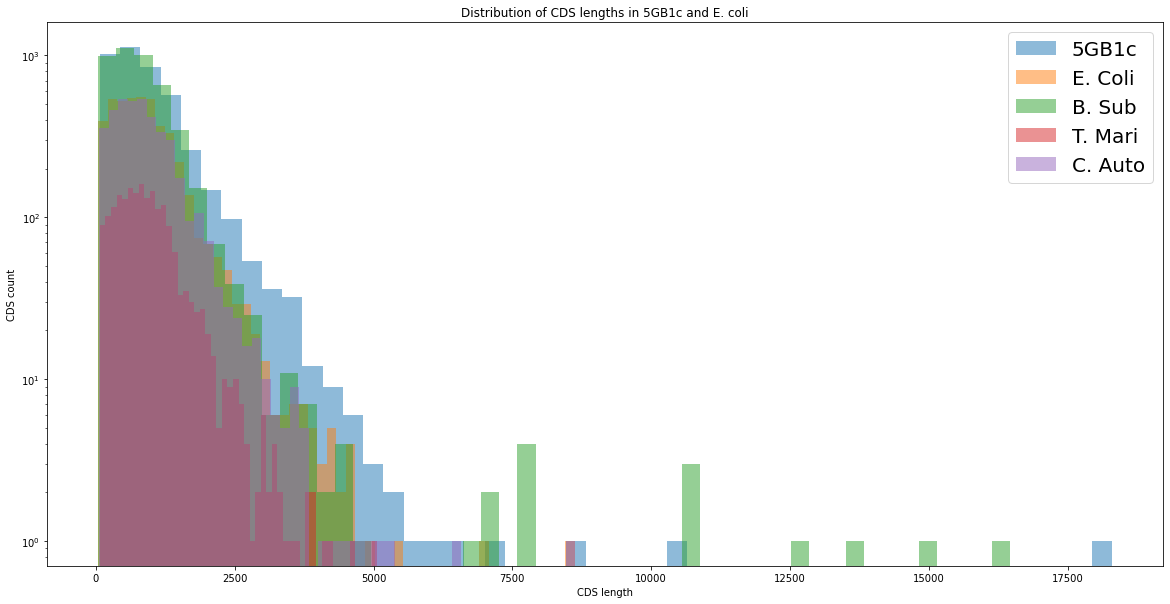

In [12]:
cds_5G_lengths = [e-s for (s,e,_,_,_,_) in cds_5G]
cds_ecoli_lengths = [e-s for (s,e,_,_,_,_) in cds_ecoli]
cds_bsub_lengths = [e-s for (s,e,_,_,_,_) in cds_bsub]
cds_tmari_lengths = [e-s for (s,e,_,_,_,_) in cds_tmari]
cds_cauto_lengths = [e-s for (s,e,_,_,_,_) in cds_cauto]

plt.figure(figsize=(20,10))
plt.hist(cds_5G_lengths, alpha = 0.5, bins=50, label='5GB1c')
plt.hist(cds_ecoli_lengths, alpha = 0.5, bins=50, label='E. Coli')
plt.hist(cds_bsub_lengths, alpha = 0.5, bins=50, label='B. Sub')
plt.hist(cds_tmari_lengths, alpha = 0.5, bins=50, label='T. Mari')
plt.hist(cds_cauto_lengths, alpha = 0.5, bins=50, label='C. Auto')
plt.yscale('log')
plt.xlabel("CDS length")
plt.ylabel("CDS count")
plt.title("Distribution of CDS lengths in 5GB1c and E. coli")
plt.legend(fontsize = 20)
plt.show()

### Distribution of CDSs across genome
Exploring the distribution of CDS annotations through the length of the genome. Are some areas more densely packed than others?

First viz type: create a histogram of annotation counts across the genome by position. Taller bars indicate more CDS annotations occur in that window.

In [13]:
# get the middle coordinate of each feature and make a histogram

cds_mean_coord_5G = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_5G]
cds_mean_coord_ecoli = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_ecoli]
cds_mean_coord_bsub = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_bsub]
cds_mean_coord_tmari = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_tmari]
cds_mean_coord_cauto = [np.mean([e,s]) for (s,e,_,_,_,_) in cds_cauto]

Second viz type: The skinny bars in the histrogram are a little awkward and hard to see. This time, instead of a histogram, I make a heatmap where the darker color indicates more genes fall within this window along the genome. 

In [14]:
# Use numpy's histogram function to get bin the genes and 
# get the edge values for the heatmap

counts_5G,edges_5G = np.histogram(cds_mean_coord_5G, 
                                  bins=np.arange(0,5000000,10000))

counts_ecoli,edges_ecoli = np.histogram(cds_mean_coord_ecoli, 
                                        bins=np.arange(0,5000000,10000))

counts_bsub,edges_bsub = np.histogram(cds_mean_coord_bsub, 
                                        bins=np.arange(0,5000000,10000))

counts_tmari,edges_tmari = np.histogram(cds_mean_coord_tmari, 
                                        bins=np.arange(0,5000000,10000))

counts_cauto,edges_cauto = np.histogram(cds_mean_coord_cauto, 
                                        bins=np.arange(0,5000000,10000))

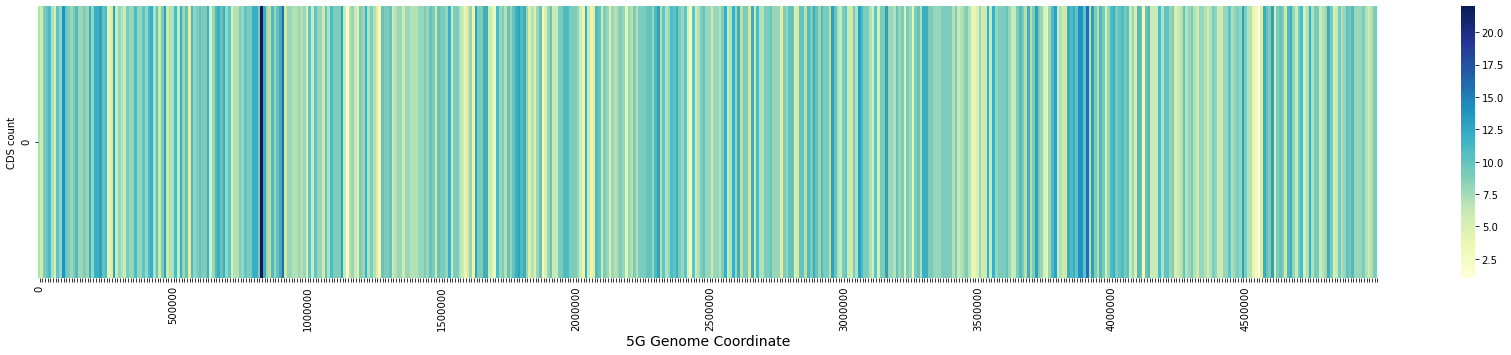

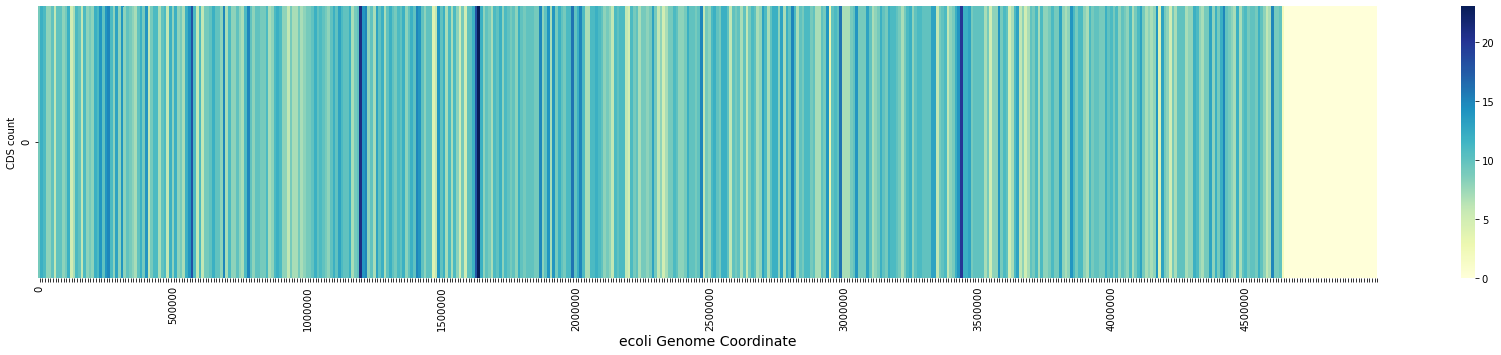

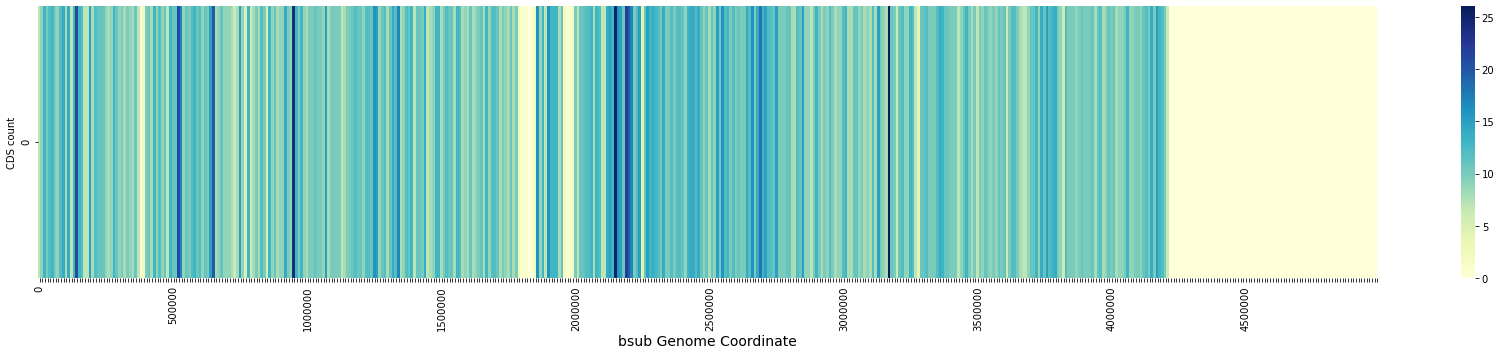

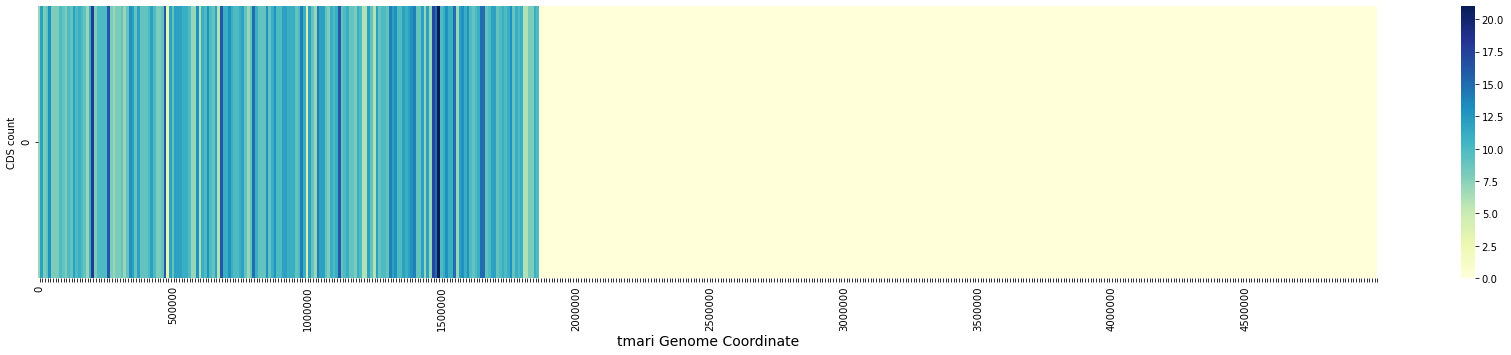

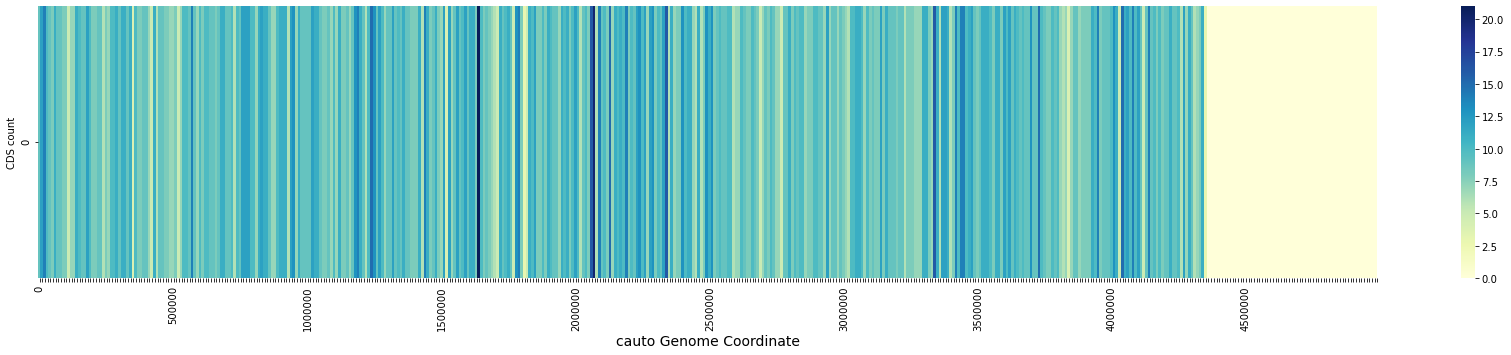

In [15]:
def genome_cds_heatmap(org,counts,edges):
    # 5G heatmap
    plt.figure(figsize=(30,5))
    #sns.set(font_scale=2)
    g = sns.heatmap([counts], xticklabels=edges, cmap="YlGnBu")

    # reduce number of ticks on the x-axis
    for i,label in enumerate(g.xaxis.get_ticklabels()):
        if (i % 50) != 0:
            label.set_visible(False)

    plt.xlabel(f"{org} Genome Coordinate", fontsize=14)
    plt.ylabel("CDS count")
    plt.show()

genome_cds_heatmap("5G",counts_5G,edges_5G)
genome_cds_heatmap("ecoli",counts_ecoli,edges_ecoli)
genome_cds_heatmap("bsub",counts_bsub,edges_bsub)
genome_cds_heatmap("tmari",counts_tmari,edges_tmari)
genome_cds_heatmap("cauto",counts_cauto,edges_cauto)

# Write out locus tags of all loci for each org

There is a script in the repository `promoter-id-from-rnaseq` to extract 300bp upstream regions from all locus tags. In order to use it, write out some temp files of `locus_id, False` so the script can run:

In [16]:
def write_out_locus_tags(cds_list,outf):
    with open(outf,'w') as f:
        f.write(f'locus_tag\tdummy\n')
        for (_,_,_,locus_tag,_,_) in cds_list:
            f.write(f'{locus_tag}\tFalse\n')

In [17]:
write_out_locus_tags(cds_5G,'organism_loci/5G_loci.txt')
write_out_locus_tags(cds_ecoli,'organism_loci/ecoli_loci.txt')
write_out_locus_tags(cds_bsub,'organism_loci/bsub_loci.txt')
write_out_locus_tags(cds_tmari,'organism_loci/tmari_loci.txt')
write_out_locus_tags(cds_cauto,'organism_loci/cauto_loci.txt')

# Use promoter files to create XY df
Use the `extract_upstream_regions.py` script from [promoter-id-from-rnaseq](https://github.com/erinhwilson/promoter-id-from-rnaseq/blob/master/extract_upstream_regions.py) to generate upstream promoter fasta files with the following commands:

* `python extract_upstream_regions.py organism_loci/5G_loci.txt data/5GB1c_sequence_20220411.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/ecoli_loci.txt data/ecoli_NC_000913.3.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/bsub_loci.txt data/bsubtilis_AL009126.gbff organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/tmari_loci.txt data/tmaritima3.gb organism_loci/ -t -a`
* `python extract_upstream_regions.py organism_loci/cauto_loci.txt data/cauto_sequence.gb organism_loci/ -t -a`

Use these outputs and load into XY files for future prediction tasks

In [18]:
def load_promoter_seqs(filename):
    '''
    Load fasta file of promoters into ID, desc, and seq. It expects
    each fasta header to be divided by "|" with in the format:
    LOCUS_TAG|GENE_SYMBOL|PRODUCT
    '''
    proms = []
    with open(filename,'r') as f:
        for line in f:
            if line.startswith(">"):
                full_header = line.strip()[1:].strip()
                locus_tag = full_header.split('|')[0]
            else:
                seq = line.strip().upper()
                proms.append((locus_tag,full_header,seq))
                
    return proms

def parse_loc2info(locus_tag,header,seq):
    gene = header.split('|')[1]
    prod = header.split('|')[2]
    
    #return (locus_tag,{'gene':gene,'product':prod,'seq':seq})
    return [locus_tag,gene,prod,seq]

def get_org_info_from_promoter_fasta(filename):
    proms = load_promoter_seqs(filename)
    loc2info = [parse_loc2info(x,y,z) for (x,y,z) in proms]
    return loc2info

In [19]:
loc2info_ecoli = get_org_info_from_promoter_fasta('organism_loci/ecoli_loci_upstream_regions_w300_min20.fa')
loc2info_ecoli[:5]

[['b0001',
  'thrL',
  'thr operon leader peptide',
  'ACAACAACGCCTGGGGCTTTTAGAGCAACGAGACACGGCAATGTTGCACCGTTTGCTGCATGATATTGAAAAAAATATCACCAAATAAAAAACGCCTTAGTAAGTATTTTTCAGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATC'],
 ['b0002',
  'thrA',
  'fused aspartate kinase/homoserine dehydrogenase 1',
  'CTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAAC'],
 ['b0003',
  'thrB',
  'homoserine kinase',
  'CTGTCACAACTCGACGATCTCTTTGCCGCGCGCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGGCAATATTGATGAAGATGGCGTCTGCCGCGTGAAGATTGCCGAAGTGGATGGTAATGATCCGCTGTTCAAAGTGAAAAATGGCGAAAACGCCCTGGCCTTCTATAGCCACTATTATCAGCCGCTGCCGTTGGTAC

In [20]:
all_org_df = pd.DataFrame()
orgs = ['5G','ecoli','bsub','tmari','cauto']

for i,org in enumerate(orgs):
    org_info = get_org_info_from_promoter_fasta(f'organism_loci/{org}_loci_upstream_regions_w300_min20.fa')
    org_df = pd.DataFrame(org_info,columns=['locus_tag','gene','product','upstream_region'])
    org_df['org'] = org
    org_df['id'] = i
    
    all_org_df = pd.concat([all_org_df,org_df])
    
all_org_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [21]:
# filter to only sequences with 300bp
final_df = all_org_df[all_org_df['upstream_region'].str.len() == 300]
final_df

,locus_tag,gene,product,upstream_region,org,id
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,ACTGTTAGCTTGGCACGGCCCTTGGCTCTGCGGGCGTTAAGGACTT...,5G,0
1,EQU24_RS00010,dnaN,DNA polymerase III subunit beta,GTGGACGCGATCACACCACGGTTATTAATGCTTGTAAACGCATTGC...,5G,0
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,TTGCGAAGAGGGGCGGTTTCTCGTCCGACAGGCGTCGGCGGCAAGG...,5G,0
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,ATTGTTAGTTCTATGTTTAAAGCTTGCGCAAGTACAATTATTGTCG...,5G,0
4,EQU24_RS00035,,hypothetical protein,GTATAAACCATGAAAGTCAGCCTATTTCGAAGATACCGACACCCTA...,5G,0
...,...,...,...,...,...,...
4088,CAETHG_RS20445,,4Fe-4S double cluster binding domain-containin...,ATTTGTTTCCTTGTTATCCATCAATTACCTCCTAAATTAATAATTT...,cauto,4
4089,CAETHG_RS20450,,cytosine permease,TTGTATATTATATTCCAACATAAGTATGTCCTCCTTTATAATATGG...,cauto,4
4090,CAETHG_RS20455,codA,cytosine deaminase,ATGGTATTTGGACCTATTTTTGGAATTATGATAACAGATTACTATT...,cauto,4
4091,CAETHG_RS20460,,immunity 22 family protein,AGATGAATATGATGTTATAAGAAAACAATCAGAGGTGCTGTATTCC...,cauto,4


In [22]:
final_df.to_csv("data/5org_upstream_regions.tsv",sep='\t',index=False)

In [23]:
final_df['org'].value_counts()

ecoli    4537
bsub     4442
5G       4233
cauto    4093
tmari    1944
Name: org, dtype: int64

# Save some stratified train/test splits

In [24]:
from sklearn.model_selection import StratifiedKFold 

In [25]:
skf = StratifiedKFold(n_splits=5)


_____Split 0____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


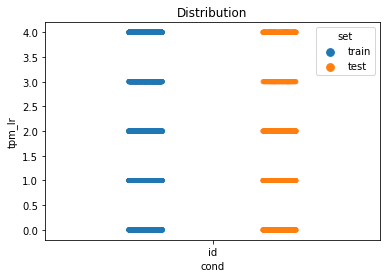


_____Split 1____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


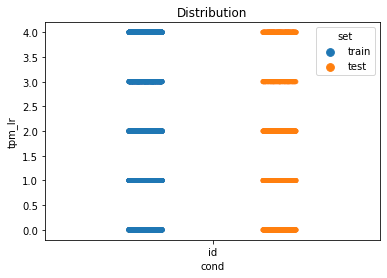


_____Split 2____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


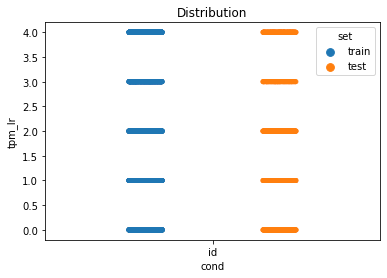


_____Split 3____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


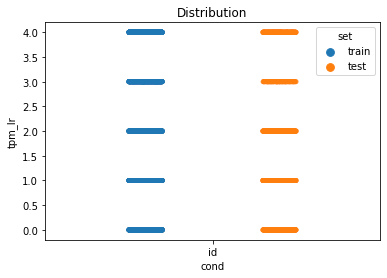


_____Split 4____


/home/ubuntu/workspace/mbur-sequence-learning/viz.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['set'] = 'train'
/home/ubuntu/workspace/mbur-sequence-learning/viz.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['set'] = 'test'


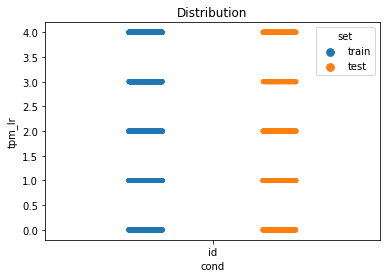

In [26]:
for i, (train_idxs, test_idxs) in enumerate(skf.split(final_df, final_df['id'])):
    print(f"_____Split {i}____")
    train_df = final_df.iloc[train_idxs]
    test_df = final_df.iloc[test_idxs]
    
    score_col = "id"

    v.view_train_test_dist(train_df, test_df,[score_col],id_col='locus_tag')
    
    print("")
    
    split_dfs = {
        'train':train_df,
        'test':test_df
    }
    
    train_df.to_csv(f'data/5org_cls_splits/cv{i}_train.tsv',index=False,sep='\t')
    test_df.to_csv(f'data/5org_cls_splits/cv{i}_test.tsv',index=False,sep='\t')

# Extract CDS sequences
While we're here with lists of CDSs, let's extract those into an easy file too

In [27]:
cds_5G[:5]

[(0, 1317, 1, 'EQU24_RS00005', 'dnaA', 'CDS'),
 (1502, 2603, 1, 'EQU24_RS00010', 'dnaN', 'CDS'),
 (3060, 4140, 1, 'EQU24_RS00015', 'recF', 'CDS'),
 (4185, 6600, 1, 'EQU24_RS00020', 'gyrB', 'CDS'),
 (7350, 7734, 1, 'EQU24_RS00035', '', 'CDS')]

In [28]:
def get_cds_lists(org_name,cds_list,genome,min_seq_len=300):
    '''
    Given a list of CDS tuples and a genome, extract all
    the CDS sequences, with at least min_seq_len bp
    '''
    
    data = []
    for (s,e,strand,lt,gene,typee) in cds_list:
        cds_len = e-s
        extended = False
        # check extension for positive strand
        if strand == 1:
            # if length of CDS is < 300, get at least 300
            if cds_len < min_seq_len:
                print(f"found short cds {lt} on +, with length {cds_len}")
                print(f"extending by {min_seq_len-cds_len}")
                e = e + min_seq_len-cds_len
                extended = True
            seq = genome[s:e]
        
        if strand==-1:
            # if length of CDS is < 300, get at least 300
            if cds_len < min_seq_len:
                print(f"found short cds {lt} on -, with length {cds_len}")
                print(f"extending by {min_seq_len-cds_len}")
                s = s - (min_seq_len-cds_len)
                extended = True
            
            seq = genome[s:e]
            seq = seq.reverse_complement()
        
        seq = ''.join(seq)
        
        data.append([org_name,lt,seq,strand,typee,extended])
        
    return pd.DataFrame(data,columns=['org_name','locus_tag','CDS_seq','strand','type','extended?'])
        

In [29]:
cds_data_5G = get_cds_lists('5G',cds_5G,genome_5G)

found short cds EQU24_RS00070 on +, with length 216
extending by 84
found short cds EQU24_RS00160 on -, with length 297
extending by 3
found short cds EQU24_RS00165 on -, with length 297
extending by 3
found short cds EQU24_RS00175 on -, with length 279
extending by 21
found short cds EQU24_RS00190 on -, with length 228
extending by 72
found short cds EQU24_RS00215 on +, with length 210
extending by 90
found short cds EQU24_RS00230 on +, with length 222
extending by 78
found short cds EQU24_RS00250 on +, with length 291
extending by 9
found short cds EQU24_RS00255 on +, with length 291
extending by 9
found short cds EQU24_RS00260 on +, with length 291
extending by 9
found short cds EQU24_RS00320 on +, with length 258
extending by 42
found short cds EQU24_RS00370 on +, with length 192
extending by 108
found short cds EQU24_RS00455 on +, with length 213
extending by 87
found short cds EQU24_RS00505 on +, with length 234
extending by 66
found short cds EQU24_RS00525 on +, with length 77
e

found short cds EQU24_RS07865 on -, with length 273
extending by 27
found short cds EQU24_RS07915 on +, with length 264
extending by 36
found short cds EQU24_RS07950 on +, with length 198
extending by 102
found short cds EQU24_RS07955 on +, with length 92
extending by 208
found short cds EQU24_RS07960 on +, with length 77
extending by 223
found short cds EQU24_RS07965 on +, with length 76
extending by 224
found short cds EQU24_RS08025 on +, with length 282
extending by 18
found short cds EQU24_RS22325 on -, with length 174
extending by 126
found short cds EQU24_RS08050 on +, with length 192
extending by 108
found short cds EQU24_RS22330 on +, with length 147
extending by 153
found short cds EQU24_RS08070 on -, with length 228
extending by 72
found short cds EQU24_RS08095 on -, with length 234
extending by 66
found short cds EQU24_RS22335 on +, with length 162
extending by 138
found short cds EQU24_RS08100 on -, with length 180
extending by 120
found short cds EQU24_RS08125 on +, with l

found short cds EQU24_RS13310 on -, with length 279
extending by 21
found short cds EQU24_RS13335 on +, with length 252
extending by 48
found short cds EQU24_RS13510 on -, with length 282
extending by 18
found short cds EQU24_RS13520 on -, with length 273
extending by 27
found short cds EQU24_RS13560 on -, with length 288
extending by 12
found short cds EQU24_RS22430 on +, with length 249
extending by 51
found short cds EQU24_RS13640 on +, with length 258
extending by 42
found short cds EQU24_RS13725 on +, with length 195
extending by 105
found short cds EQU24_RS13735 on -, with length 216
extending by 84
found short cds EQU24_RS13785 on +, with length 273
extending by 27
found short cds EQU24_RS22435 on -, with length 165
extending by 135
found short cds EQU24_RS13860 on +, with length 270
extending by 30
found short cds EQU24_RS13885 on +, with length 198
extending by 102
found short cds EQU24_RS13900 on +, with length 261
extending by 39
found short cds EQU24_RS13975 on -, with leng

found short cds EQU24_RS19525 on +, with length 279
extending by 21
found short cds EQU24_RS19540 on -, with length 282
extending by 18
found short cds EQU24_RS19570 on -, with length 228
extending by 72
found short cds EQU24_RS22580 on +, with length 168
extending by 132
found short cds EQU24_RS19635 on -, with length 267
extending by 33
found short cds EQU24_RS22585 on +, with length 147
extending by 153
found short cds EQU24_RS19745 on -, with length 279
extending by 21
found short cds EQU24_RS22590 on -, with length 144
extending by 156
found short cds EQU24_RS22595 on +, with length 141
extending by 159
found short cds EQU24_RS22600 on -, with length 138
extending by 162
found short cds EQU24_RS22605 on +, with length 144
extending by 156
found short cds EQU24_RS19995 on +, with length 234
extending by 66
found short cds EQU24_RS20005 on +, with length 291
extending by 9
found short cds EQU24_RS20010 on +, with length 270
extending by 30
found short cds EQU24_RS20015 on +, with le

In [30]:
print(min([len(x) for x in cds_data_5G['CDS_seq']]))
max([len(x) for x in cds_data_5G['CDS_seq']])

300


18306

(0.0, 5000.0)

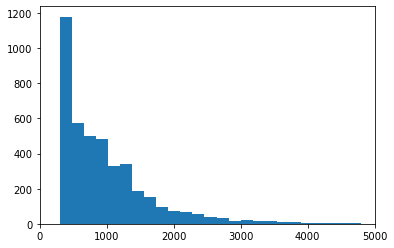

In [31]:
plt.hist([len(x) for x in cds_data_5G['CDS_seq']],bins=100)
plt.xlim(0,5000)

In [32]:
cds_data_ecoli = get_cds_lists('ecoli',cds_ecoli,genome_ecoli)
cds_data_bsub = get_cds_lists('bsub',cds_bsub,genome_bsub)
cds_data_tmari = get_cds_lists('tmari',cds_tmari,genome_tmari)
cds_data_cauto = get_cds_lists('cauto',cds_cauto,genome_cauto)

found short cds b0001 on +, with length 66
extending by 234
found short cds b0005 on +, with length 297
extending by 3
found short cds b0018 on -, with length 210
extending by 90
found short cds b4412 on -, with length 153
extending by 147
found short cds b4413 on +, with length 55
extending by 245
found short cds b0022 on -, with length 276
extending by 24
found short cds b0023 on -, with length 264
extending by 36
found short cds b0024 on +, with length 219
extending by 81
found short cds b0044 on +, with length 288
extending by 12
found short cds b0057 on +, with length 159
extending by 141
found short cds b4577 on +, with length 227
extending by 73
found short cds b4662 on +, with length 132
extending by 168
found short cds b0075 on -, with length 87
extending by 213
found short cds b4726 on -, with length 45
extending by 255
found short cds b0101 on -, with length 198
extending by 102
found short cds b4727 on +, with length 45
extending by 255
found short cds b4728 on +, with leng

found short cds b4409 on +, with length 126
extending by 174
found short cds b1625 on +, with length 216
extending by 84
found short cds b1643 on +, with length 237
extending by 63
found short cds b1648 on -, with length 240
extending by 60
found short cds b4602 on -, with length 90
extending by 210
found short cds b1665 on +, with length 77
extending by 223
found short cds b1666 on +, with length 77
extending by 223
found short cds b1675 on -, with length 210
extending by 90
found short cds b1677 on +, with length 237
extending by 63
found short cds b4430 on -, with length 68
extending by 232
found short cds b1685 on -, with length 189
extending by 111
found short cds b4431 on +, with length 105
extending by 195
found short cds b1700 on +, with length 294
extending by 6
found short cds b1705 on +, with length 192
extending by 108
found short cds b1715 on -, with length 45
extending by 255
found short cds b1717 on -, with length 198
extending by 102
found short cds b4535 on +, with len

extending by 179
found short cds b3238 on +, with length 264
extending by 36
found short cds b3239 on -, with length 273
extending by 27
found short cds b3242 on -, with length 204
extending by 96
found short cds b3257 on +, with length 243
extending by 57
found short cds b3261 on +, with length 297
extending by 3
found short cds b3263 on +, with length 180
extending by 120
found short cds b3267 on +, with length 222
extending by 78
found short cds b3272 on -, with length 120
extending by 180
found short cds b3273 on -, with length 76
extending by 224
found short cds b3274 on -, with length 120
extending by 180
found short cds b3276 on -, with length 76
extending by 224
found short cds b3277 on -, with length 77
extending by 223
found short cds b3280 on -, with length 258
extending by 42
found short cds b4550 on -, with length 219
extending by 81
found short cds b3299 on -, with length 117
extending by 183
found short cds b3302 on -, with length 180
extending by 120
found short cds b33

found short cds b4655 on +, with length 126
extending by 174
found short cds b4281 on -, with length 231
extending by 69
found short cds b4282 on +, with length 249
extending by 51
found short cds b4294 on +, with length 276
extending by 24
found short cds b4624 on +, with length 90
extending by 210
found short cds b4565 on -, with length 279
extending by 21
found short cds b4566 on -, with length 258
extending by 42
found short cds b4657 on -, with length 246
extending by 54
found short cds b4720 on +, with length 102
extending by 198
found short cds b4721 on +, with length 144
extending by 156
found short cds b4722 on +, with length 84
extending by 216
found short cds b4715 on -, with length 258
extending by 42
found short cds b4341 on +, with length 165
extending by 135
found short cds b4625 on +, with length 77
extending by 223
found short cds b4353 on -, with length 204
extending by 96
found short cds b4567 on +, with length 237
extending by 63
found short cds b4368 on -, with len

found short cds BSU_08490 on -, with length 192
extending by 108
found short cds BSU_08500 on -, with length 111
extending by 189
found short cds BSU_08550 on -, with length 153
extending by 147
found short cds BSU_08560 on +, with length 270
extending by 30
found short cds BSU_08640 on -, with length 225
extending by 75
found short cds BSU_08660 on +, with length 255
extending by 45
found short cds BSU_rRNA_18 on +, with length 116
extending by 184
found short cds BSU_tRNA_29 on +, with length 75
extending by 225
found short cds BSU_tRNA_30 on +, with length 92
extending by 208
found short cds BSU_tRNA_31 on +, with length 72
extending by 228
found short cds BSU_tRNA_32 on +, with length 76
extending by 224
found short cds BSU_tRNA_33 on +, with length 77
extending by 223
found short cds BSU_tRNA_34 on +, with length 77
extending by 223
found short cds BSU_tRNA_35 on +, with length 76
extending by 224
found short cds BSU_tRNA_36 on +, with length 73
extending by 227
found short cds BS

extending by 93
found short cds BSU_24440 on -, with length 282
extending by 18
found short cds BSU_24600 on +, with length 174
extending by 126
found short cds BSU_24660 on -, with length 180
extending by 120
found short cds BSU_24710 on -, with length 297
extending by 3
found short cds BSU_tRNA_73 on +, with length 71
extending by 229
found short cds BSU_24780 on +, with length 246
extending by 54
found short cds BSU_24800 on +, with length 174
extending by 126
found short cds BSU_24860 on -, with length 216
extending by 84
found short cds BSU_24880 on -, with length 174
extending by 126
found short cds BSU_24900 on -, with length 150
extending by 150
found short cds BSU_25120 on +, with length 255
extending by 45
found short cds BSU_25220 on +, with length 297
extending by 3
found short cds BSU_25289 on -, with length 144
extending by 156
found short cds BSU_25360 on -, with length 282
extending by 18
found short cds BSU_25410 on -, with length 174
extending by 126
found short cds B

found short cds BSU_35870 on -, with length 168
extending by 132
found short cds BSU_35980 on +, with length 297
extending by 3
found short cds BSU_36140 on -, with length 222
extending by 78
found short cds BSU_36200 on -, with length 261
extending by 39
found short cds BSU_36215 on -, with length 126
extending by 174
found short cds BSU_36269 on -, with length 144
extending by 156
found short cds BSU_36420 on -, with length 282
extending by 18
found short cds BSU_36430 on -, with length 111
extending by 189
found short cds BSU_36499 on -, with length 168
extending by 132
found short cds BSU_36575 on +, with length 132
extending by 168
found short cds BSU_36668 on -, with length 165
extending by 135
found short cds BSU_36669 on -, with length 183
extending by 117
found short cds BSU_36670 on -, with length 189
extending by 111
found short cds BSU_36720 on -, with length 162
extending by 138
found short cds BSU_36739 on -, with length 141
extending by 159
found short cds BSU_36780 on -

found short cds Tmari_0564 on +, with length 195
extending by 105
found short cds Tmari_R0032 on +, with length 73
extending by 227
found short cds Tmari_0605 on +, with length 228
extending by 72
found short cds Tmari_0611 on +, with length 171
extending by 129
found short cds Tmari_0612 on +, with length 120
extending by 180
found short cds Tmari_0617 on +, with length 93
extending by 207
found short cds Tmari_0622 on -, with length 150
extending by 150
found short cds Tmari_0624 on -, with length 165
extending by 135
found short cds Tmari_0636 on -, with length 234
extending by 66
found short cds Tmari_0637 on -, with length 210
extending by 90
found short cds Tmari_0638 on -, with length 195
extending by 105
found short cds Tmari_0659 on +, with length 162
extending by 138
found short cds Tmari_0662 on -, with length 246
extending by 54
found short cds Tmari_0675 on +, with length 204
extending by 96
found short cds Tmari_0693 on +, with length 273
extending by 27
found short cds T

found short cds Tmari_1865 on -, with length 180
extending by 120
found short cds Tmari_1886 on +, with length 276
extending by 24
found short cds Tmari_1889 on +, with length 201
extending by 99
found short cds CAETHG_RS00005 on +, with length 207
extending by 93
found short cds CAETHG_RS00010 on -, with length 258
extending by 42
found short cds CAETHG_RS00070 on -, with length 204
extending by 96
found short cds CAETHG_RS00120 on -, with length 162
extending by 138
found short cds CAETHG_RS00135 on +, with length 198
extending by 102
found short cds CAETHG_RS00145 on +, with length 234
extending by 66
found short cds CAETHG_RS00160 on +, with length 213
extending by 87
found short cds CAETHG_RS00175 on +, with length 198
extending by 102
found short cds CAETHG_RS00350 on +, with length 177
extending by 123
found short cds CAETHG_RS00405 on -, with length 186
extending by 114
found short cds CAETHG_RS00420 on +, with length 225
extending by 75
found short cds CAETHG_RS00445 on +, wit

found short cds CAETHG_RS05670 on -, with length 273
extending by 27
found short cds CAETHG_RS05700 on -, with length 228
extending by 72
found short cds CAETHG_RS05740 on +, with length 297
extending by 3
found short cds CAETHG_RS05745 on +, with length 171
extending by 129
found short cds CAETHG_RS05750 on -, with length 297
extending by 3
found short cds CAETHG_RS05780 on +, with length 153
extending by 147
found short cds CAETHG_RS05790 on +, with length 165
extending by 135
found short cds CAETHG_RS05795 on +, with length 225
extending by 75
found short cds CAETHG_RS05800 on +, with length 168
extending by 132
found short cds CAETHG_RS05815 on -, with length 243
extending by 57
found short cds CAETHG_RS05825 on -, with length 87
extending by 213
found short cds CAETHG_RS05860 on -, with length 216
extending by 84
found short cds CAETHG_RS05885 on -, with length 237
extending by 63
found short cds CAETHG_RS06020 on +, with length 138
extending by 162
found short cds CAETHG_RS06080 

extending by 105
found short cds CAETHG_RS15825 on +, with length 270
extending by 30
found short cds CAETHG_RS15865 on +, with length 195
extending by 105
found short cds CAETHG_RS15985 on +, with length 267
extending by 33
found short cds CAETHG_RS16075 on +, with length 144
extending by 156
found short cds CAETHG_RS16085 on -, with length 159
extending by 141
found short cds CAETHG_RS16090 on -, with length 240
extending by 60
found short cds CAETHG_RS16170 on +, with length 198
extending by 102
found short cds CAETHG_RS16215 on +, with length 225
extending by 75
found short cds CAETHG_RS16260 on +, with length 171
extending by 129
found short cds CAETHG_RS16410 on +, with length 243
extending by 57
found short cds CAETHG_RS16610 on +, with length 267
extending by 33
found short cds CAETHG_RS16620 on +, with length 264
extending by 36
found short cds CAETHG_RS16635 on +, with length 291
extending by 9
found short cds CAETHG_RS16640 on +, with length 297
extending by 3
found short cd

In [33]:
for cds_df in [cds_data_5G, cds_data_ecoli, cds_data_bsub, cds_data_tmari,cds_data_cauto]:
    print(cds_df['extended?'].value_counts())

False    3675
True      559
Name: extended?, dtype: int64
False    3880
True      657
Name: extended?, dtype: int64
False    3663
True      780
Name: extended?, dtype: int64
False    1723
True      221
Name: extended?, dtype: int64
False    3561
True      532
Name: extended?, dtype: int64


In [35]:
all_cds_df = pd.concat([cds_data_5G, cds_data_ecoli, cds_data_bsub, cds_data_tmari,cds_data_cauto])
all_cds_df

,org_name,locus_tag,CDS_seq,strand,type,extended?
0,5G,EQU24_RS00005,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,1,CDS,False
1,5G,EQU24_RS00010,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,1,CDS,False
2,5G,EQU24_RS00015,ATGAGTTTACAAAAGCTCGACATTTTTAATGTTAGAAATATTCGGC...,1,CDS,False
3,5G,EQU24_RS00020,ATGAGCGAAAATATTAAGCAGTACGATAGTACGAATATTCAGGTGC...,1,CDS,False
4,5G,EQU24_RS00035,ATGTCGACGCCCTTCAAAACAGCCTTAGTCATTTTTCTCGTGATCC...,1,CDS,False
...,...,...,...,...,...,...
4088,cauto,CAETHG_RS20445,ATGTTGGAATATAATATACAAAAAATATTGAATAATTTTATGATAG...,-1,CDS,False
4089,cauto,CAETHG_RS20450,ATGGATAACAAGGAAACAAATGAAAAAGTACATAAGGAATATGCTG...,1,CDS,False
4090,cauto,CAETHG_RS20455,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,1,CDS,False
4091,cauto,CAETHG_RS20460,ATGGAGTATGAAGGAATAGTATCTATATGGCTGGCAAAATGTGAAG...,1,CDS,False


In [41]:
all_cds_df[all_cds_df['extended?']==True]

,org_name,locus_tag,CDS_seq,strand,type,extended?
11,5G,EQU24_RS00070,ATGGGCATCAGCGTTACGCAATTAGTCATCATCATGGTCATCGTGA...,1,CDS,True
29,5G,EQU24_RS00160,ATGAAAACATTATCGACTTCACTGCTTGCATTGGCTTTGACTGCCG...,-1,CDS,True
30,5G,EQU24_RS00165,ATGAAAACATTATCTATTTCACTGCTTGCATTGGCTTTGACTGCCG...,-1,CDS,True
32,5G,EQU24_RS00175,TTGCTGGATCCCATTGCATCGGAAACACTCTATCCGGTGTTGGCCG...,-1,CDS,True
35,5G,EQU24_RS00190,TTGCCTGTAGAGGGAAGCGATGAACTCAAACAGACCAACGAAATTG...,-1,CDS,True
...,...,...,...,...,...,...
4073,cauto,CAETHG_RS20370,ATGAATTCTCATGGAAATAAGAAAGAAAAACAAGGAACTCATAATC...,-1,CDS,True
4083,cauto,CAETHG_RS20420,GGTGTTCCAGCAGAGTTAATCCATATAAGCTACGGCATTGAAGACA...,-1,CDS,True
4084,cauto,CAETHG_RS20425,ATGAGTAAGAAAAATTCTTCTAGTAAAAATTACAGTAATACACAAT...,-1,CDS,True
4085,cauto,CAETHG_RS20430,ATGGATAACAATAAAAATAGGATGAAAGATAGGCCTAAGTCTAATG...,-1,CDS,True


In [42]:
# add org ids
org2id = dict([(org,i) for i,org in enumerate(orgs)])

all_cds_df['org_id'] = all_cds_df['org_name'].apply(lambda x: org2id[x])
all_cds_df

,org_name,locus_tag,CDS_seq,strand,type,extended?,org_id
0,5G,EQU24_RS00005,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,1,CDS,False,0
1,5G,EQU24_RS00010,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,1,CDS,False,0
2,5G,EQU24_RS00015,ATGAGTTTACAAAAGCTCGACATTTTTAATGTTAGAAATATTCGGC...,1,CDS,False,0
3,5G,EQU24_RS00020,ATGAGCGAAAATATTAAGCAGTACGATAGTACGAATATTCAGGTGC...,1,CDS,False,0
4,5G,EQU24_RS00035,ATGTCGACGCCCTTCAAAACAGCCTTAGTCATTTTTCTCGTGATCC...,1,CDS,False,0
...,...,...,...,...,...,...,...
4088,cauto,CAETHG_RS20445,ATGTTGGAATATAATATACAAAAAATATTGAATAATTTTATGATAG...,-1,CDS,False,4
4089,cauto,CAETHG_RS20450,ATGGATAACAAGGAAACAAATGAAAAAGTACATAAGGAATATGCTG...,1,CDS,False,4
4090,cauto,CAETHG_RS20455,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,1,CDS,False,4
4091,cauto,CAETHG_RS20460,ATGGAGTATGAAGGAATAGTATCTATATGGCTGGCAAAATGTGAAG...,1,CDS,False,4


In [43]:
# save as is
all_cds_df.to_csv('data/5org_cds_regions.tsv',sep='\t',index=False)

## Now save a version that only has 300bp seqs, but if the seq is long enough, split into multiple examples

In [44]:
all_300bp_cds_df = pd.DataFrame()
all_300bp_cds_df

""


In [45]:
for i,row in all_cds_df.iterrows():
    if i % 1000 == 0:
        print(f"row {i} of {all_cds_df.shape[0]}")
    seq = row['CDS_seq']
    cds_len = len(seq)
    
    seq_chunks = int(np.floor(cds_len/300))
    
    #print(row['locus_tag'],seq_chunks)
    
    start = 0
    for j in range(seq_chunks):
        end = start + 300
        subseq = seq[start:end]
        new_row = row.copy()
        new_row['CDS_seq'] = subseq
        new_row['chunk_id'] = j
        all_300bp_cds_df = all_300bp_cds_df.append(new_row)
        #print(new_row)
        start = end
        
    

row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251
row 0 of 19251
row 1000 of 19251
row 0 of 19251
row 1000 of 19251
row 2000 of 19251
row 3000 of 19251
row 4000 of 19251


In [46]:
all_300bp_cds_df

,CDS_seq,chunk_id,extended?,locus_tag,org_id,org_name,strand,type
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,0.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
0,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,1.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
0,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,2.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
0,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,3.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
1,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,0.0,0.0,EQU24_RS00010,0.0,5G,1.0,CDS
...,...,...,...,...,...,...,...,...
4090,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,0.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
4090,CTTAAATGGCAGATAGCAAATGGAATACAGTATGTAAGAACACATG...,1.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
4090,GATAAACTGGTTGATGTCCACTGTGATGAAATTGATGATGAGCAGT...,2.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
4090,GTATGTTTTGGACACGATGATATATGTGATCCATGGTATCCAATGG...,3.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS


In [47]:
print(min([len(x) for x in all_300bp_cds_df['CDS_seq']]))
max([len(x) for x in all_300bp_cds_df['CDS_seq']])

300


300

In [48]:
all_300bp_cds_df['org_name'].value_counts()

ecoli    12304
5G       12127
bsub     11162
cauto    10890
tmari     5280
Name: org_name, dtype: int64

(array([    0.,     0.,     0.,     0.,     0., 51763.,     0.,     0.,
            0.,     0.]),
 array([299.5, 299.6, 299.7, 299.8, 299.9, 300. , 300.1, 300.2, 300.3,
        300.4, 300.5]),
 <BarContainer object of 10 artists>)

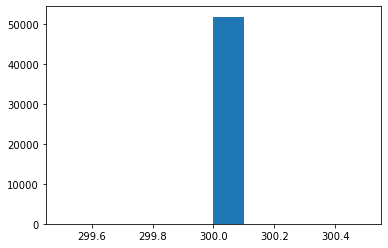

In [49]:
plt.hist([len(x) for x in all_300bp_cds_df['CDS_seq'].values])


In [50]:
# Save this 300bp df
all_300bp_cds_df.to_csv("data/5org_cds_regions_300bp.tsv",sep='\t',index=False)

These dataframes are now prepped and ready to use in other pre-training tasks!
* `data/5org_upstream_regions.tsv`
* `data/5org_cds_regions.tsv`
* `data/5org_cds_regions_300bp.tsv`

In [51]:
df = pd.read_csv('data/5org_cds_regions_300bp.tsv',sep='\t')
df

,CDS_seq,chunk_id,extended?,locus_tag,org_id,org_name,strand,type
0,ATGAGTGCACTCTGGAACAACTGTCTCGCTAAACTTGAAAATGAAA...,0.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
1,AACTTTCTTAATAGAGCATTCATTTTCGATAACTTTGTCGAAGGTA...,1.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
2,GATACATTGCTGATTGACGATATTCAATTCTTTGCCGGCAAGGAAC...,2.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
3,CCTTCGAATGTACGAGATCTCGAAGGCGCATTACGACGAGTTATTG...,3.0,0.0,EQU24_RS00005,0.0,5G,1.0,CDS
4,ATGAAATATATTATTAATAGAGAACAGCTATTGGTTCCATTGCAGC...,0.0,0.0,EQU24_RS00010,0.0,5G,1.0,CDS
...,...,...,...,...,...,...,...,...
51758,ATGTTAATAAAAAATGTAAGACTTAGAAATAAAGATGGAATATATG...,0.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
51759,CTTAAATGGCAGATAGCAAATGGAATACAGTATGTAAGAACACATG...,1.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
51760,GATAAACTGGTTGATGTCCACTGTGATGAAATTGATGATGAGCAGT...,2.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS
51761,GTATGTTTTGGACACGATGATATATGTGATCCATGGTATCCAATGG...,3.0,0.0,CAETHG_RS20455,4.0,cauto,1.0,CDS


In [54]:
# make sure that nothing that was extended has multiple chunks to it!
sum(df[df['extended?']==1.0]['chunk_id'])

0.0